In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jtemp = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
jtemp_list = []
for temp in jtemp:
    jtemp_list.append(temp.tobs)

print(jtemp_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_jtemp = pd.DataFrame(jtemp_list, columns=["June Temps"])
df_jtemp

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
np.round(df_jtemp.describe(),2)

,June Temps
count,1700.00
mean,74.94
std,3.26
min,64.00
25%,73.00
50%,75.00
75%,77.00
max,85.00


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dtemp = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
dtemp_list=[]
for temp in dtemp:
    dtemp_list.append(temp.tobs)

print(dtemp_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dtemp = pd.DataFrame(dtemp_list, columns=["December Temps"])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
np.round(df_dtemp.describe(),2)

,December Temps
count,1517.00
mean,71.04
std,3.75
min,56.00
25%,69.00
50%,71.00
75%,74.00
max,83.00


## Additional Queries

In [12]:
# Check column names and values of measurement table
# engine.execute("select * from measurement").keys()
# >>> RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])
# engine.execute("select * from measurement").fetchone()
# >>> (1, 'USC00519397', '2010-01-01', 0.08, 65.0)

# Check column names and values of station table 
# engine.execute("select * from station").keys()
# >>> RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
# engine.execute("select * from station").fetchone()
# >>> (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)

In [13]:
# list of months for query
mos = [6, 12]

# query count of obervation for June and December grouped by year
result = session.query(extract('year',Measurement.date), extract('month',Measurement.date),
                        func.count(Measurement.tobs)).\
                        filter(extract('month',Measurement.date).in_(mos)).\
                        group_by(extract('year',Measurement.date),\
                                extract('month',Measurement.date)).all()            
for row in result:
    print(row)
    
# result shows no observation for December 2017    

(2010, 6, 242)
(2010, 12, 235)
(2011, 6, 227)
(2011, 12, 223)
(2012, 6, 211)
(2012, 12, 218)
(2013, 6, 217)
(2013, 12, 234)
(2014, 6, 215)
(2014, 12, 223)
(2015, 6, 203)
(2015, 12, 184)
(2016, 6, 194)
(2016, 12, 200)
(2017, 6, 191)


In [18]:
# redo temp analysis - June
jtemp2 = session.query(Measurement).filter(Measurement.date < '2017-01-01',
                                           extract('month', Measurement.date) == 6)
# convert to list
jtemp_list2 = [temp.tobs for temp in jtemp2]
# convert to DataFrame
df_jtemp2 = pd.DataFrame(jtemp_list2, columns=["June Temps"])
# get summary statistics
np.round(df_jtemp2.describe(),2)

,June Temps
count,1509.00
mean,74.66
std,3.22
min,64.00
25%,72.00
50%,75.00
75%,77.00
max,85.00


In [19]:
# redo temp analysis - December
dtemp2 = session.query(Measurement).filter(Measurement.date < '2017-01-01', 
                                           extract('month', Measurement.date) == 12)
# convert to list
dtemp_list2 = [temp.tobs for temp in dtemp2]
# convert to DataFrame
df_dtemp2 = pd.DataFrame(dtemp_list2, columns=["December Temps"])
# get summary statistics
np.round(df_dtemp2.describe(),2)

,December Temps
count,1517.00
mean,71.04
std,3.75
min,56.00
25%,69.00
50%,71.00
75%,74.00
max,83.00


In [16]:
# Precipitation Data
# check number of observations per station
session.query(Measurement.station, func.min(Measurement.date), func.max(Measurement.date), func.count(Measurement.station)).\
    filter(Measurement.date >= '2014-01-01', Measurement.date < '2017-01-01').\
    group_by(Measurement.station).all()

[('USC00511918', '2014-01-01', '2015-10-30', 544),
 ('USC00513117', '2014-01-01', '2016-12-31', 1061),
 ('USC00514830', '2014-01-02', '2016-12-31', 899),
 ('USC00516128', '2014-01-01', '2016-12-31', 1012),
 ('USC00517948', '2014-01-02', '2016-12-30', 571),
 ('USC00518838', '2014-01-06', '2015-11-20', 32),
 ('USC00519281', '2014-01-01', '2016-12-31', 1095),
 ('USC00519397', '2014-01-01', '2016-12-31', 1093),
 ('USC00519523', '2014-01-01', '2016-12-30', 1019)]

Text(0.5, 1.0, '3 Year Precipitation Data')

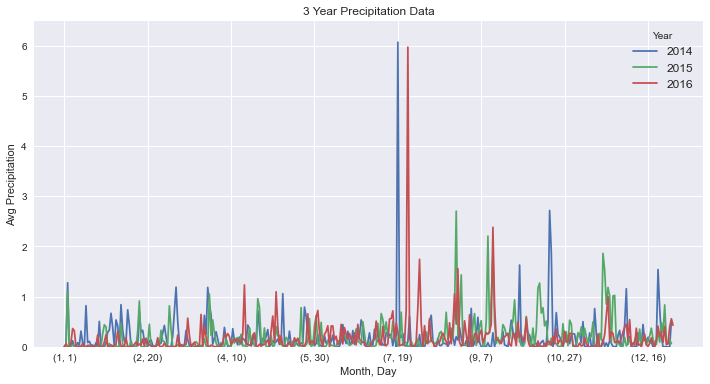

In [17]:
# USC00511918, USC00517948, and USC00518838 will not be included for the precipitation analysis due to inactivity
# list of active stations
active_stations = ['USC00513117','USC00514830','USC00516128','USC00519281','USC00519397','USC00519523']

# Query 3 years of precipitation data
twenty_fourteen = session.query(extract('month',Measurement.date), extract('day',Measurement.date), func.avg(Measurement.prcp)).\
                  filter((Measurement.station).in_(active_stations),
                         Measurement.date >= '2014-01-01', Measurement.date < '2015-01-01').\
                         group_by(Measurement.date).all()
twenty_fifteen = session.query(extract('month',Measurement.date), extract('day',Measurement.date), func.avg(Measurement.prcp)).\
                 filter((Measurement.station).in_(active_stations),
                        Measurement.date >= '2015-01-01', Measurement.date < '2016-01-01').\
                        group_by(Measurement.date).all()
twenty_sixteen = session.query(extract('month',Measurement.date), extract('day',Measurement.date), func.avg(Measurement.prcp)).\
                filter((Measurement.station).in_(active_stations),
                        Measurement.date >= '2016-01-01', Measurement.date < '2017-01-01').\
                        group_by(Measurement.date).all()

# Transform to DataFrame
twenty_fourteen_df = pd.DataFrame(twenty_fourteen, columns=['month','day','precipitation'])
twenty_fourteen_df.set_index((['month','day']), inplace=True)
twenty_fifteen_df = pd.DataFrame(twenty_fifteen, columns=['month','day','precipitation'])
twenty_fifteen_df.set_index((['month','day']), inplace=True)
twenty_sixteen_df = pd.DataFrame(twenty_sixteen, columns=['month','day','precipitation'])
twenty_sixteen_df.set_index((['month','day']), inplace=True)

# Create plot
ax = twenty_fourteen_df.plot(figsize=(12,6))
twenty_fifteen_df.plot(ax=ax)
twenty_sixteen_df.plot(ax=ax)
labels=[2014, 2015, 2016]
plt.legend(labels=labels, fontsize=12, title='Year')
plt.ylim(0,6.5)
plt.ylabel('Avg Precipitation')
plt.xlabel('Month, Day')
plt.title('3 Year Precipitation Data')